## Titanic dataset 
<span style="color:red"> this is application of logistic regression algorithm , we have a question to answer 
</span>
### what factors made people to surivie the sinking of Titanic ?
<span style="color:blue; font-family:calibri; font-size:17px;">
    we start by importing liberaries we need to mainpulate data and get insights inorder to helping us to find dependent,independent        variables, and generate more accurate data predictions  


In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib as plt
%matplotlib inline
titanic_df = pd.read_csv("train.csv")


In [2]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Analyse dataset and get insights 

overall conclusion unservived number is much grater than survived



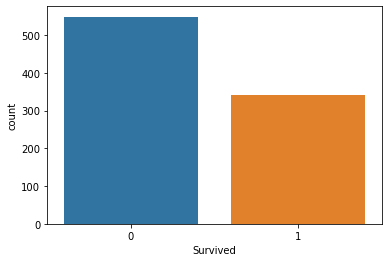

In [4]:
sns.countplot(x="Survived",data=titanic_df)



## Females are more lucky than Males as shown below
survived number of females are significantly larger than males   

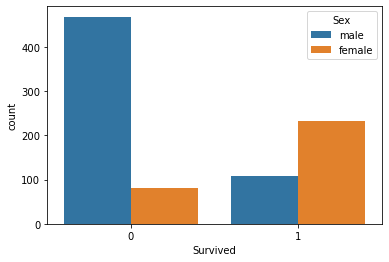

In [6]:
sns.countplot(x="Survived",hue="Sex",data=titanic_df)

## First class passengers made it
As shown below first class has the largest number od servived numbers , and third class has the largest number of unsuvived  

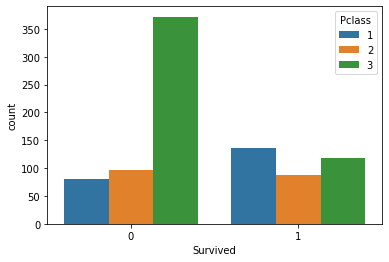

In [7]:
sns.countplot(x="Survived",hue="Pclass",data=titanic_df)

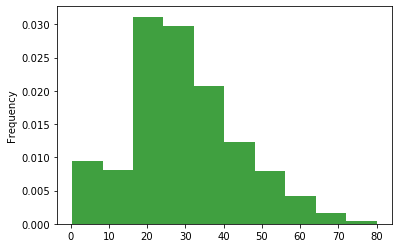

In [8]:
age_plot= titanic_df["Age"].plot
age_plot.hist(x="Age",facecolor='g',density=True,alpha=0.75)


## Data wrangling proccess
clean and handle the missing data , convert dependent string variables into numeric intities ,drop unnecessary values     

In [3]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
age=np.mean(titanic_df['Age'])
titanic_df['Age'].fillna(age,inplace=True)

### drop Cabin column

In [8]:
titanic_df.drop(['Cabin'], inplace=True,axis=1)


In [6]:
titanic_df.dropna(inplace=True)
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
sex=pd.get_dummies(titanic_df['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [10]:
embark =pd.get_dummies(titanic_df['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [11]:
Pcl =pd.get_dummies(titanic_df['Pclass'],drop_first=True)
Pcl.head()


,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [13]:
titanic_df=pd.concat([titanic_df,sex,Pcl,embark],axis=1)

In [14]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [15]:
titanic_df.drop(['Sex','Name','Embarked','Pclass','Ticket'],axis=1,inplace=True)

In [16]:
titanic_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


## Train and test data 
data has become ready to be trained and tested 

In [17]:
X = titanic_df.drop(['Survived'],axis=1)
y =titanic_df['Survived'] 

In [137]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train,y_test = train_test_split(X , y , test_size=0.35 ,random_state=45)

### Importing logistic regression alogrithm 

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
logmodel= LogisticRegression( multi_class='auto',solver='liblinear')

### Fit training X on training Y 

In [140]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### predict y value with X_test values 

In [141]:
predict =logmodel.predict(X_test)

In [142]:
from sklearn.metrics  import classification_report

In [143]:
classification_report(y_test,predict)

'              precision    recall  f1-score   support\n\n           0       0.86      0.89      0.87       203\n           1       0.77      0.72      0.75       109\n\n    accuracy                           0.83       312\n   macro avg       0.82      0.81      0.81       312\nweighted avg       0.83      0.83      0.83       312\n'

#### Check Confusion Matrix
  checking actual yes , no values to predicted yes ,no values  

In [144]:
from sklearn.metrics import confusion_matrix

In [145]:
confusion_matrix(y_test,predict)

array([[180,  23],
       [ 30,  79]])

## Accuracy check 
The model accuracy is 83% 

In [146]:
from sklearn.metrics import accuracy_score

In [148]:
accuracy_score(y_test,predict)

0.8301282051282052